In [1]:
import pandas as pd
df = pd.read_csv('customer_booking.csv', encoding='latin1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [3]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [4]:
df['booking_complete'].sum()

7478

In [5]:
#to decide converting method I should look the unique values in categorical variables
categorical_columns = df.select_dtypes(include='object').columns

for col in categorical_columns:
    print(f"{col} categories :")
    print(df[col].unique())
    print("-" * 40)

sales_channel categories :
['Internet' 'Mobile']
----------------------------------------
trip_type categories :
['RoundTrip' 'CircleTrip' 'OneWay']
----------------------------------------
flight_day categories :
['Sat' 'Wed' 'Thu' 'Mon' 'Sun' 'Tue' 'Fri']
----------------------------------------
route categories :
['AKLDEL' 'AKLHGH' 'AKLHND' 'AKLICN' 'AKLKIX' 'AKLKTM' 'AKLKUL' 'AKLMRU'
 'AKLPEK' 'AKLPVG' 'AKLTPE' 'AORICN' 'AORKIX' 'AORKTM' 'AORMEL' 'BBIMEL'
 'BBIOOL' 'BBIPER' 'BBISYD' 'BDOCTS' 'BDOCTU' 'BDOHGH' 'BDOICN' 'BDOIKA'
 'BDOKIX' 'BDOMEL' 'BDOOOL' 'BDOPEK' 'BDOPER' 'BDOPUS' 'BDOPVG' 'BDOSYD'
 'BDOTPE' 'BDOXIY' 'BKICKG' 'BKICTS' 'BKICTU' 'BKIHND' 'BKIICN' 'BKIKIX'
 'BKIKTM' 'BKIMEL' 'BKIMRU' 'BKIOOL' 'BKIPEK' 'BKIPER' 'BKIPUS' 'BKIPVG'
 'BKISYD' 'BKIXIY' 'BLRICN' 'BLRMEL' 'BLRPER' 'BLRSYD' 'BOMMEL' 'BOMOOL'
 'BOMPER' 'BOMSYD' 'BTJJED' 'BTUICN' 'BTUPER' 'BTUSYD' 'BTUWUH' 'BWNCKG'
 'BWNDEL' 'BWNHGH' 'BWNIKA' 'BWNKTM' 'BWNMEL' 'BWNOOL' 'BWNPER' 'BWNSYD'
 'BWNTPE' 'CANDEL' 'CANIK

In [6]:
from scipy.stats import f_oneway

anova_pvals = {}

for col in df.select_dtypes(include="object").columns:
    #  booking_complete for all categories
    groups = [df.loc[df[col] == cat, 'booking_complete'].dropna()
              for cat in df[col].dropna().unique()]

    # At least 2 groups are needed
    if len(groups) < 2:
        continue

    stat, p = f_oneway(*groups)   # stat = F, p = p‑value
    anova_pvals[col] = p          # ♻︎ save only p

# p‑values
anova_series = (pd.Series(anova_pvals, name='p_value')
                  .sort_values())      # ascending=True

print(anova_series.head(10))          # most significant 10 cat.


route             0.000000e+00
booking_origin    0.000000e+00
sales_channel     4.119431e-20
trip_type         2.166417e-09
flight_day        1.318012e-02
Name: p_value, dtype: float64


C:\Users\ayseg\AppData\Local\Temp\ipykernel_10356\3563268370.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target.index, y=corr_target.values, palette="ch:s=.25,rot=-.25")


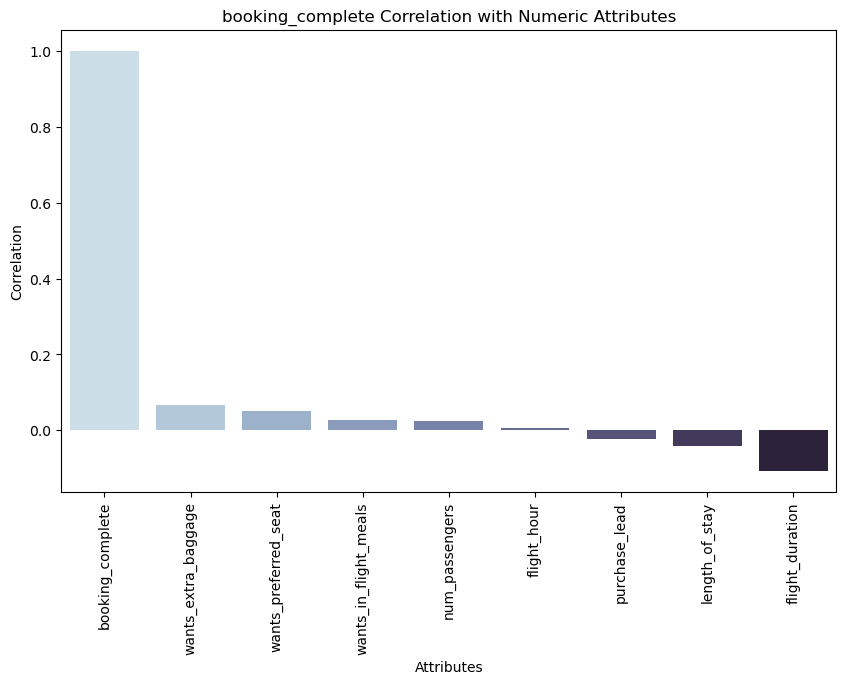

In [7]:
#Correlation for booking_complete w/ numeric attributes
import seaborn as sns
import matplotlib.pyplot as plt

df_numeric = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = df_numeric.corr()
corr_target = corr_matrix['booking_complete'].sort_values(ascending=False)

# Visualization
plt.figure(figsize=(10,6))
sns.barplot(x=corr_target.index, y=corr_target.values, palette="ch:s=.25,rot=-.25")
plt.xticks(rotation=90)
plt.title("booking_complete Correlation with Numeric Attributes")
plt.xlabel("Attributes")
plt.ylabel("Correlation")
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder
#categorical into  numeric
label_cols = ['sales_channel', 'trip_type', 'flight_day']
df_encoded = df.copy()

for col in label_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [9]:
df_encoded.head(2)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,0,2,112,20,3,2,AKLDEL,New Zealand,0,0,0,5.52,0


In [10]:
#Test - Train
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

features = ['sales_channel', 'trip_type', 'flight_day', 
            'wants_extra_baggage', 'wants_preferred_seat',
            'length_of_stay', 'flight_duration']

X = df_encoded[features]
y = df_encoded['booking_complete']

#split train - test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
for col, score in zip(features, importances):
    print(f"{col}: {score:.4f}")

sales_channel: 0.0162
trip_type: 0.0059
flight_day: 0.1815
wants_extra_baggage: 0.0245
wants_preferred_seat: 0.0209
length_of_stay: 0.4967
flight_duration: 0.2545


In [11]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix

# Accuracy 
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", cv_scores)
print("Mean CV accuracy: {:.2f}%".format(cv_scores.mean() * 100))

# report of prediction
y_cv_pred = cross_val_predict(rf_model, X, y, cv=5)
print(classification_report(y, y_cv_pred))

Cross-validation accuracy scores: [0.8351 0.7873 0.6931 0.3832 0.3758]
Mean CV accuracy: 61.49%
              precision    recall  f1-score   support

           0       0.84      0.68      0.75     42522
           1       0.12      0.24      0.15      7478

    accuracy                           0.61     50000
   macro avg       0.48      0.46      0.45     50000
weighted avg       0.73      0.61      0.66     50000



In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
import numpy as np

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(f"\nFold {fold+1}")
    
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    rf_model.fit(X_train_fold, y_train_fold)
    y_pred = rf_model.predict(X_test_fold)

    print(classification_report(y_test_fold, y_pred))


Fold 1
              precision    recall  f1-score   support

           0       0.85      0.96      0.91      8505
           1       0.23      0.07      0.10      1495

    accuracy                           0.83     10000
   macro avg       0.54      0.51      0.50     10000
weighted avg       0.76      0.83      0.79     10000


Fold 2
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      8505
           1       0.28      0.07      0.12      1495

    accuracy                           0.83     10000
   macro avg       0.57      0.52      0.51     10000
weighted avg       0.77      0.83      0.79     10000


Fold 3
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      8504
           1       0.28      0.08      0.13      1496

    accuracy                           0.83     10000
   macro avg       0.57      0.52      0.52     10000
weighted avg       0.77      0.83      0.79     10

In [13]:
#some inquries to choose balancing method
counts = df['booking_complete'].value_counts()
ratio = counts[1] / counts[0]
print(f"Minority class (1) / Majority class (0) rate: {ratio:.4f}")

Minority class (1) / Majority class (0) rate: 0.1759


In [14]:
#Repeating train - test

X = df_encoded[features]
y = df_encoded['booking_complete'] 

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(rf_model, X, y, cv=cv, scoring='f1_macro')
print("F1 Macro scores:", scores)
print(f"Mean F1 Macro: {scores.mean():.4f}")

F1 Macro scores: [0.55041317 0.55606012 0.55477376 0.55263569 0.54885783]
Mean F1 Macro: 0.5525


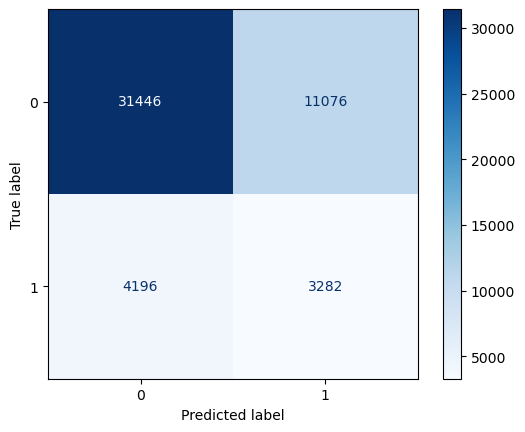

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

# Prediction with 5 fold
y_pred = cross_val_predict(rf_model, X, y, cv=cv)

# Confusion Matrix 
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')

In [16]:
from imblearn.over_sampling import SMOTE


X = df_encoded[features]
y = df['booking_complete'] 

# Split train - test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# SMOTE for only train
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# 4. Test and prediction
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.74      0.80      8504
           1       0.22      0.41      0.28      1496

    accuracy                           0.69     10000
   macro avg       0.55      0.58      0.54     10000
weighted avg       0.78      0.69      0.73     10000

[[6314 2190]
 [ 885  611]]


In [18]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled) 

RandomForestClassifier(random_state=42)

C:\Users\ayseg\AppData\Local\Temp\ipykernel_10356\3286756089.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='Blues_d')


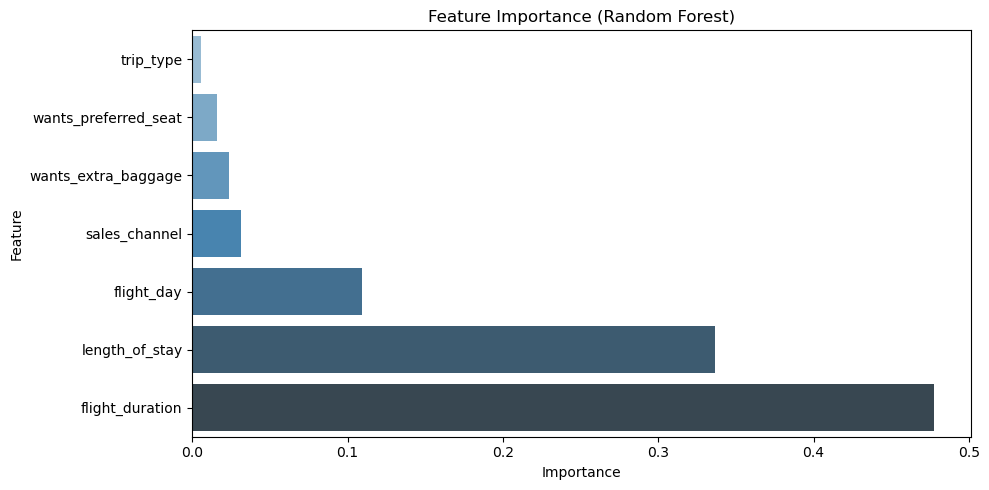

In [19]:
import matplotlib.pyplot as pl

feature_names = features
importances = rf_model.feature_importances_

# 2. DataFrame into visualization
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=True)

# 3. Graph
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='Blues_d')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()